In [1]:
# Tuning visualization for CNN-LSTM (signals)
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure display
sns.set(context="notebook", style="whitegrid")

# Locate results CSV (prefer ./results, fallback ./saved_models)
results_path = "./results/tuning_signals_results.csv"
# if not os.path.isfile(results_path):
#     alt = "./saved_models/tuning_signals_results.csv"
#     if os.path.isfile(alt):
#         results_path = alt
#     else:
#         raise FileNotFoundError("Could not find tuning_signals_results.csv under ./results or ./saved_models")

# Load
df = pd.read_csv(results_path)
# Coerce numeric (in case some are strings)
for col in ["learning_rate","batch_size","hidden_size","num_layers","dropout","val_acc","val_loss"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(f"Loaded {len(df)} trials from: {results_path}")
df.head()

Loaded 108 trials from: ./results/tuning_signals_results.csv


,learning_rate,batch_size,hidden_size,num_layers,dropout,val_acc,val_loss,epochs,duration_min
0,0.001,32,64,1,0.3,63.9294,0.6695,8,0.18
1,0.001,32,64,1,0.5,63.7937,0.6910,8,0.18
2,0.001,32,64,2,0.3,63.4544,0.6705,8,0.28
3,0.001,32,64,2,0.5,61.8935,0.7253,8,0.27
4,0.001,32,100,1,0.3,62.5721,0.6531,8,0.23


In [2]:
# Quick overview
print(df.describe(include="all"))
# Top-10 by validation accuracy
best10 = df.sort_values("val_acc", ascending=False).head(10)
best10


       learning_rate  batch_size  hidden_size  num_layers     dropout  \
count     108.000000  108.000000   108.000000  108.000000  108.000000   
mean        0.000533   74.666667    97.333333    1.500000    0.400000   
std         0.000370   40.097078    26.317969    0.502331    0.100466   
min         0.000100   32.000000    64.000000    1.000000    0.300000   
25%         0.000100   32.000000    64.000000    1.000000    0.300000   
50%         0.000500   64.000000   100.000000    1.500000    0.400000   
75%         0.001000  128.000000   128.000000    2.000000    0.500000   
max         0.001000  128.000000   128.000000    2.000000    0.500000   

          val_acc    val_loss  epochs  duration_min  
count  108.000000  108.000000   108.0    108.000000  
mean    58.822532    0.770187     8.0      0.250185  
std      5.690292    0.104555     0.0      0.078609  
min     40.923000    0.642900     8.0      0.130000  
25%     59.009200    0.693200     8.0      0.187500  
50%     61.197850 

,learning_rate,batch_size,hidden_size,num_layers,dropout,val_acc,val_loss,epochs,duration_min
13,0.0010,64,64,1,0.5,64.3705,0.6982,8,0.15
0,0.0010,32,64,1,0.3,63.9294,0.6695,8,0.18
5,0.0010,32,100,1,0.5,63.9294,0.6907,8,0.23
1,0.0010,32,64,1,0.5,63.7937,0.6910,8,0.18
2,0.0010,32,64,2,0.3,63.4544,0.6705,8,0.28
43,0.0005,32,100,2,0.5,63.4204,0.6835,8,0.37
9,0.0010,32,128,1,0.5,63.0811,0.7219,8,0.25
8,0.0010,32,128,1,0.3,63.0811,0.6652,8,0.26
14,0.0010,64,64,2,0.3,62.9454,0.6853,8,0.24
11,0.0010,32,128,2,0.5,62.8775,0.7160,8,0.42


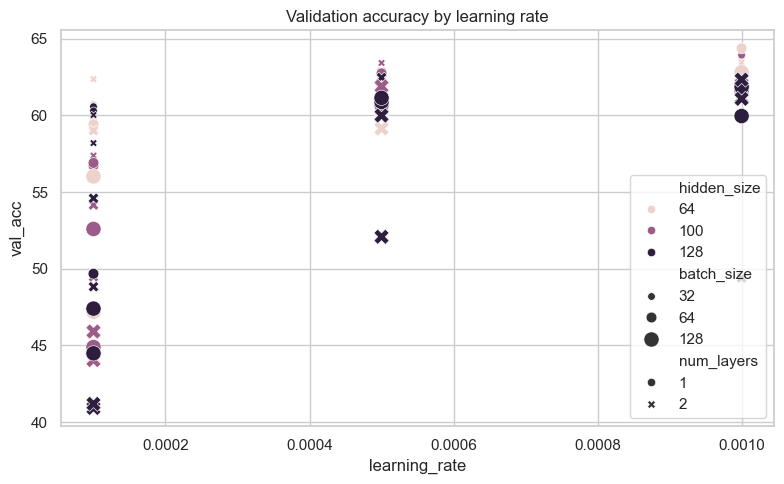

In [3]:
# Scatter overview: val_acc vs learning_rate, encoding other hparams
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="learning_rate", y="val_acc",
                hue="hidden_size", style="num_layers", size="batch_size", sizes=(30,120))
plt.title("Validation accuracy by learning rate")
plt.tight_layout()
os.makedirs("./results", exist_ok=True)
plt.savefig("./results/tune_scatter_lr.png", dpi=200)
plt.show()


C:\Users\GOD\AppData\Local\Temp\ipykernel_23024\1412874780.py:7: FutureWarning: The provided callable <function max at 0x0000019D5BB63880> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pv = data.pivot_table(index="batch_size", columns="hidden_size", values="val_acc", aggfunc=np.max)
C:\Users\GOD\AppData\Local\Temp\ipykernel_23024\1412874780.py:7: FutureWarning: The provided callable <function max at 0x0000019D5BB63880> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pv = data.pivot_table(index="batch_size", columns="hidden_size", values="val_acc", aggfunc=np.max)
C:\Users\GOD\AppData\Local\Temp\ipykernel_23024\1412874780.py:7: FutureWarning: The provided callable <function max at 0x0000019D5BB63880> is currently using DataFrameGroupBy

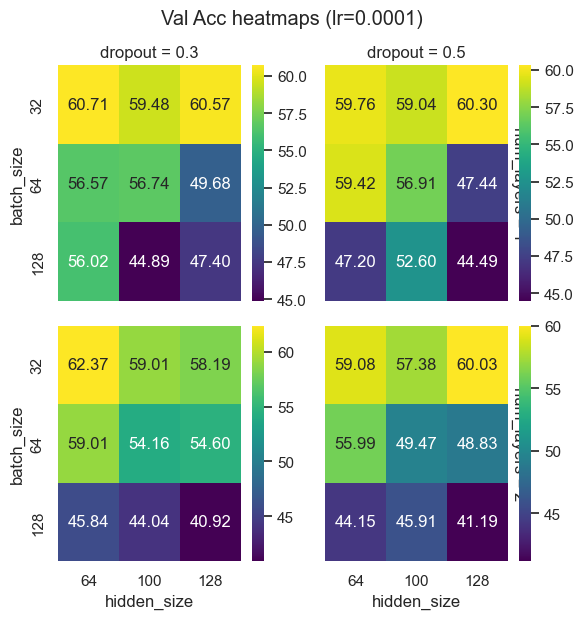

C:\Users\GOD\AppData\Local\Temp\ipykernel_23024\1412874780.py:7: FutureWarning: The provided callable <function max at 0x0000019D5BB63880> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pv = data.pivot_table(index="batch_size", columns="hidden_size", values="val_acc", aggfunc=np.max)
C:\Users\GOD\AppData\Local\Temp\ipykernel_23024\1412874780.py:7: FutureWarning: The provided callable <function max at 0x0000019D5BB63880> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pv = data.pivot_table(index="batch_size", columns="hidden_size", values="val_acc", aggfunc=np.max)
C:\Users\GOD\AppData\Local\Temp\ipykernel_23024\1412874780.py:7: FutureWarning: The provided callable <function max at 0x0000019D5BB63880> is currently using DataFrameGroupBy

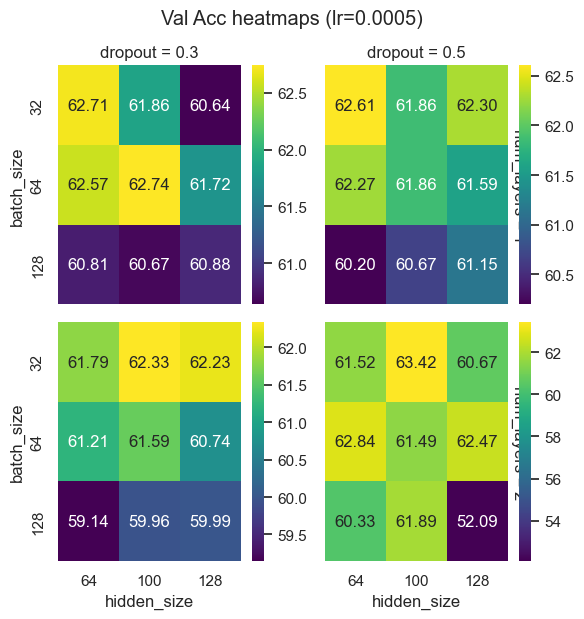

C:\Users\GOD\AppData\Local\Temp\ipykernel_23024\1412874780.py:7: FutureWarning: The provided callable <function max at 0x0000019D5BB63880> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pv = data.pivot_table(index="batch_size", columns="hidden_size", values="val_acc", aggfunc=np.max)
C:\Users\GOD\AppData\Local\Temp\ipykernel_23024\1412874780.py:7: FutureWarning: The provided callable <function max at 0x0000019D5BB63880> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pv = data.pivot_table(index="batch_size", columns="hidden_size", values="val_acc", aggfunc=np.max)
C:\Users\GOD\AppData\Local\Temp\ipykernel_23024\1412874780.py:7: FutureWarning: The provided callable <function max at 0x0000019D5BB63880> is currently using DataFrameGroupBy

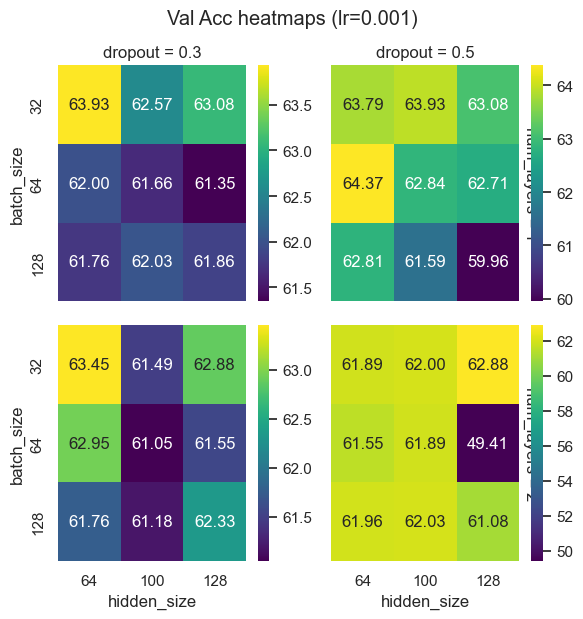

In [4]:
# Heatmaps: batch_size vs hidden_size, faceted by dropout (cols) and num_layers (rows) per learning_rate
import numpy as np
for lr in sorted(df.learning_rate.unique()):
    sub = df[df.learning_rate == lr]
    g = sns.FacetGrid(sub, col="dropout", row="num_layers", margin_titles=True, height=3)
    def draw_heat(data, color=None):
        pv = data.pivot_table(index="batch_size", columns="hidden_size", values="val_acc", aggfunc=np.max)
        sns.heatmap(pv, annot=True, fmt=".2f", cmap="viridis")
    g.map_dataframe(draw_heat)
    g.fig.suptitle(f"Val Acc heatmaps (lr={lr})", y=1.03)
    out = f"./results/tune_heatmap_lr{lr}.png"
    g.savefig(out, dpi=200)
    plt.show()


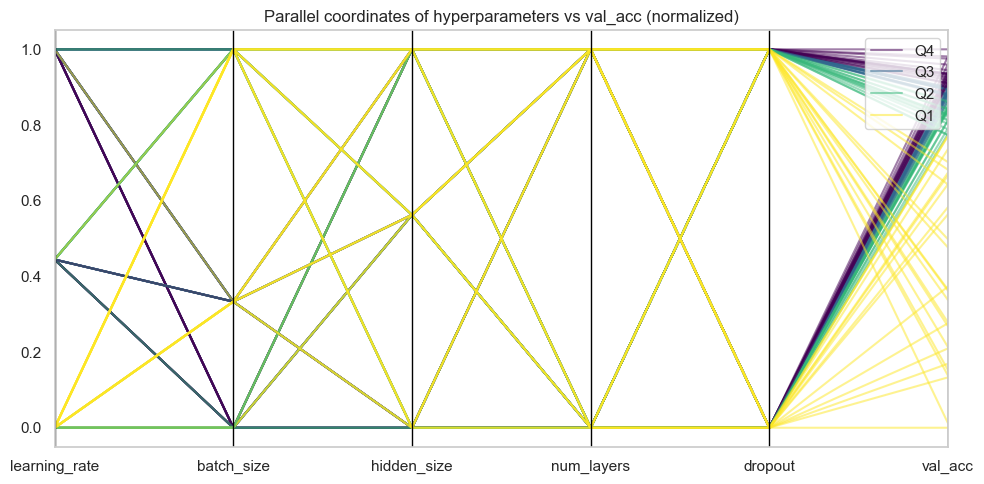

In [5]:
# Parallel coordinates to compare all hyperparameters vs val_acc
from pandas.plotting import parallel_coordinates

plot_cols = ["learning_rate","batch_size","hidden_size","num_layers","dropout","val_acc"]
# Normalize columns 0..1 for plotting
norm = df[plot_cols].copy()
for c in plot_cols:
    mn, mx = norm[c].min(), norm[c].max()
    if mx > mn:
        norm[c] = (norm[c] - mn) / (mx - mn)
    else:
        norm[c] = 0.0
# Create quartile bins for coloring
bins = pd.qcut(df["val_acc"], q=4, labels=["Q1","Q2","Q3","Q4"])
norm["acc_quartile"] = bins
plt.figure(figsize=(10,5))
parallel_coordinates(norm[plot_cols + ["acc_quartile"]], "acc_quartile", colormap="viridis", alpha=0.5)
plt.title("Parallel coordinates of hyperparameters vs val_acc (normalized)")
plt.tight_layout()
plt.savefig("./results/tune_parallel.png", dpi=200)
plt.show()


C:\Users\GOD\AppData\Local\Temp\ipykernel_23024\3791606000.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bestk, x="val_acc", y="cfg", orient="h", palette="viridis")


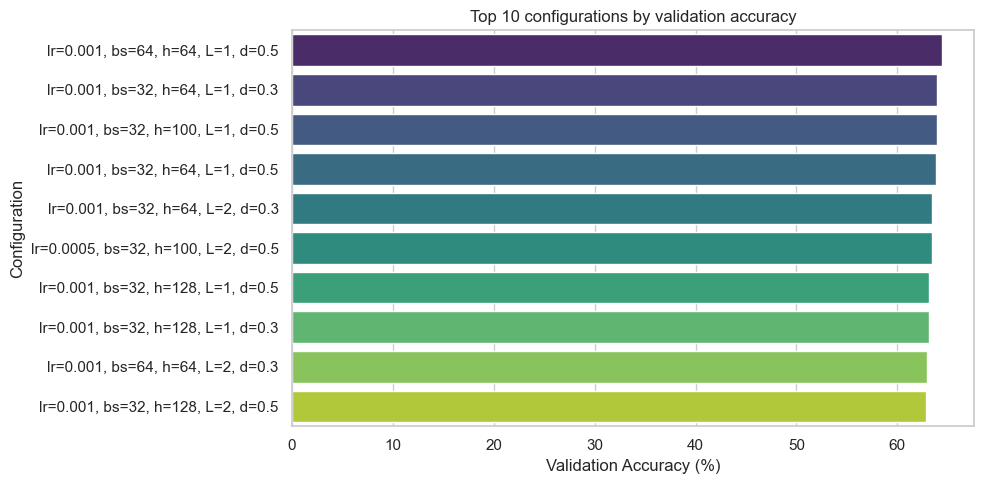

In [6]:
# Bar chart of top-k configurations by val_acc
k = 10
bestk = df.sort_values("val_acc", ascending=False).head(k).copy()
bestk["cfg"] = bestk.apply(lambda r: f"lr={r.learning_rate}, bs={int(r.batch_size)}, h={int(r.hidden_size)}, L={int(r.num_layers)}, d={r.dropout}", axis=1)
plt.figure(figsize=(10,5))
sns.barplot(data=bestk, x="val_acc", y="cfg", orient="h", palette="viridis")
plt.xlabel("Validation Accuracy (%)")
plt.ylabel("Configuration")
plt.title(f"Top {k} configurations by validation accuracy")
plt.tight_layout()
plt.savefig("./results/tune_topk.png", dpi=200)
plt.show()
